In [1]:
import os
import glob
import importlib
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xbrl_image_parser as xip

from matplotlib.path import Path
from matplotlib.patches import PathPatch

from imageio import imread

from IPython.display import HTML
from tqdm import tqdm_notebook
from PIL import Image as im
from pytesseract import image_to_data

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
wrk_dir = os.getcwd()
os.chdir(f"{os.getcwd()}/data/old/read_check/wrong")
pdf_lst = glob.glob("*.pdf")
os.chdir(wrk_dir)

In [3]:
wrk_dir = os.getcwd()
os.chdir(f"{os.getcwd()}/data/old/read_check/right")
comp_pdf_lst = glob.glob("*.pdf")
os.chdir(wrk_dir)

we follow each step in xip.process_PDF and see where it gets us

In [33]:
data_lst = [xip.ocr_pdf(f"{os.getcwd()}/data/old/read_check/wrong/{file}")
            for file in tqdm_notebook(pdf_lst)]

Converting PDF image to multiple png files
/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/10582063_2018-10-31.pdf
Performing pre-processing on all png images
Converting PDF image to multiple png files
/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/03790585_2018-09-30.pdf
Performing pre-processing on all png images
Converting PDF image to multiple png files
/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/02709473_2019-01-17.pdf
Performing pre-processing on all png images
Converting PDF image to multiple png files
/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/09618523_2018-02-21.pdf
Performing pre-processing on all png images
Converting PDF image to multiple png files
/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/10832155_2019-02-05.pdf
Performing pre-processing on all png images
Converting PDF image to multiple png files
/home/e

In [34]:
data_cords_lst = [xip.make_measurements(data) 
                  for data in tqdm_notebook(data_lst)]

In [35]:
data_lst[0].columns.to_list()

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text',
 'csv_num',
 'centre_x',
 'centre_y',
 'right',
 'bottom',
 'area']

In [36]:
data_cords_lst[0].columns.to_list()

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text',
 'csv_num',
 'centre_x',
 'centre_y',
 'right',
 'bottom',
 'area']

In [37]:
data_numeric_lst = []
for data in tqdm_notebook(data_cords_lst):
    data["numerical"] = xip.convert_to_numeric(data['text'])
    data_numeric_lst.append(data)

In [39]:
data_numeric_lst[0].columns.to_list()

['level',
 'page_num',
 'block_num',
 'par_num',
 'line_num',
 'word_num',
 'left',
 'top',
 'width',
 'height',
 'conf',
 'text',
 'csv_num',
 'centre_x',
 'centre_y',
 'right',
 'bottom',
 'area',
 'numerical']

In [38]:
balance_pages_lst = [xip.find_balance_sheet_pages(data)
                     for data in tqdm_notebook(data_numeric_lst)]

In [44]:
balance_pages_df = pd.DataFrame({"file" : pdf_lst,
                                 "balance_pages" : balance_pages_lst
                                })

In [45]:
balance_pages_df

,file,balance_pages
0,10582063_2018-10-31.pdf,[1.0]
1,03790585_2018-09-30.pdf,[]
2,02709473_2019-01-17.pdf,[]
3,09618523_2018-02-21.pdf,[6.0]
4,10832155_2019-02-05.pdf,[2.0]
5,10602392_2018-10-17.pdf,[2.0]
6,10550078_2018-09-26.pdf,"[2.0, 3.0]"
7,06522069_2018-08-21.pdf,[]
8,02119876_2017-09-21.pdf,[3.0]
9,10355449_2018-11-06.pdf,[]


In [89]:
balance_page_mask = [not not row.balance_pages for index, row in balance_pages_df.iterrows()]
balance_page_count = sum(balance_page_mask) 

In [90]:
balance_page_count

16

We have pages returning at least one balance page, but no data

In [91]:
balance_pages_df[balance_page_mask]

,file,balance_pages
0,10582063_2018-10-31.pdf,[1.0]
3,09618523_2018-02-21.pdf,[6.0]
4,10832155_2019-02-05.pdf,[2.0]
5,10602392_2018-10-17.pdf,[2.0]
6,10550078_2018-09-26.pdf,"[2.0, 3.0]"
8,02119876_2017-09-21.pdf,[3.0]
10,OC311413_2018-09-14.pdf,[3.0]
11,05084383_2018-10-01.pdf,"[1.0, 2.0]"
13,05494889_2018-10-01.pdf,"[1.0, 4.0]"
15,10479373_2018-06-21.pdf,"[7.0, 11.0]"


let's take the first one and see how it do

... taken (and slightly modified) from xip.process_PDF

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,csv_num,centre_x,centre_y,right,bottom,area,numerical
0,1,1,0,0,0,0,0,0,2480,3509,-1,None,1,1240.0,1754.5,2480,3509,8702320,NaN
1,2,1,1,0,0,0,178,214,2123,45,-1,None,1,1239.5,236.5,2301,259,95535,NaN
2,3,1,1,1,0,0,178,214,2123,45,-1,None,1,1239.5,236.5,2301,259,95535,NaN
3,4,1,1,1,1,0,178,214,2123,45,-1,None,1,1239.5,236.5,2301,259,95535,NaN
4,5,1,1,1,1,1,178,214,222,35,96,ALLISON,1,289.0,231.5,400,249,7770,NaN
5,5,1,1,1,1,2,415,214,224,35,96,JEFFERY,1,527.0,231.5,639,249,7840,NaN
6,5,1,1,1,1,3,654,214,165,35,96,LASER,1,736.5,231.5,819,249,5775,NaN
7,5,1,1,1,1,4,832,214,104,35,96,AND,1,884.0,231.5,936,249,3640,NaN
8,5,1,1,1,1,5,954,214,117,35,96,SKIN,1,1012.5,231.5,1071,249,4095,NaN
9,5,1,1,1,1,6,1088,214,175,35,96,CLINIC,1,1175.5,231.5,1263,249,6125,NaN


In [97]:
csv_number = balance_pages_df.balance_pages[0][0]
data = data_numeric_lst[0]

page_df = data[data['csv_num'] == csv_number]

# Determine where the lines are
detected_lines = xip.detect_lines(page_df)

# Get all detectable balance sheet stats
results = xip.extract_lines(page_df, detected_lines)


In [105]:
page_df.text.to_list()

[None,
 None,
 None,
 None,
 'ALLISON',
 'JEFFERY',
 'LASER',
 'AND',
 'SKIN',
 'CLINIC',
 'LIMITED',
 'Registered',
 'Number',
 '10582063',
 None,
 None,
 None,
 'Balance',
 'Sheet',
 'as',
 'at',
 '30',
 'November',
 '2017',
 None,
 None,
 None,
 '2017',
 None,
 '£',
 None,
 'Called',
 'up',
 'share',
 'capital',
 'not',
 'paid',
 '100',
 None,
 'Net',
 'assets',
 '100',
 None,
 'Issued',
 'share',
 'capital',
 None,
 '100',
 'Ordinary',
 'Shares',
 'of',
 '£',
 '1',
 'each',
 '100',
 None,
 'Total',
 'Shareholder',
 'funds',
 '100',
 None,
 'STATEMENTS',
 None,
 None,
 None,
 'a.',
 'For',
 'the',
 'year',
 'ending',
 '30',
 'November',
 '2017',
 'the',
 'company',
 'was',
 'entitled',
 'to',
 'exemption',
 'under',
 'section',
 '480',
 None,
 'of',
 'the',
 'Companies',
 'Act',
 '2006',
 'relating',
 'to',
 'dormant',
 'companies.',
 None,
 None,
 'b.',
 'The',
 'members',
 'have',
 'not',
 'required',
 'the',
 'company',
 'to',
 'obtain',
 'an',
 'audit',
 'in',
 'accordance',
 'w

So we pull out the correct page with the information on there.

In [108]:
detected_lines

[{'left': 0, 'right': 2480, 'top': 214, 'bottom': 259},
 {'left': 0, 'right': 2480, 'top': 561, 'bottom': 595},
 {'left': 0, 'right': 2480, 'top': 684, 'bottom': 720},
 {'left': 0, 'right': 2480, 'top': 751, 'bottom': 784},
 {'left': 0, 'right': 2480, 'top': 816, 'bottom': 862},
 {'left': 0, 'right': 2480, 'top': 886, 'bottom': 922},
 {'left': 0, 'right': 2480, 'top': 955, 'bottom': 1000},
 {'left': 0, 'right': 2480, 'top': 1021, 'bottom': 1066},
 {'left': 0, 'right': 2480, 'top': 1092, 'bottom': 1128},
 {'left': 0, 'right': 2480, 'top': 1186, 'bottom': 1221},
 {'left': 0, 'right': 2480, 'top': 1308, 'bottom': 1353},
 {'left': 0, 'right': 2480, 'top': 1374, 'bottom': 1419},
 {'left': 0, 'right': 2480, 'top': 1439, 'bottom': 1485},
 {'left': 0, 'right': 2480, 'top': 1505, 'bottom': 1551},
 {'left': 0, 'right': 2480, 'top': 1571, 'bottom': 1617},
 {'left': 0, 'right': 2480, 'top': 1638, 'bottom': 1682},
 {'left': 0, 'right': 2480, 'top': 1703, 'bottom': 1748},
 {'left': 0, 'right': 2480,

we detect some lines....

In [109]:
results

""


buuuuut, no results
lets run this through xip.extract_lines

In [111]:
# Look, dark magic!
finance_regex = r'(.*)\s+(\(?\-?[\,0-9]+\)?)\s+(\(?\-?[\,0-9]+\)?)$'
words_df = page_df[page_df['word_num'] > 0]

In [113]:
HTML(words_df.to_html())

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,csv_num,centre_x,centre_y,right,bottom,area,numerical
4,5,1,1,1,1,1,178,214,222,35,96,ALLISON,1,289.0,231.5,400,249,7770,NaN
5,5,1,1,1,1,2,415,214,224,35,96,JEFFERY,1,527.0,231.5,639,249,7840,NaN
6,5,1,1,1,1,3,654,214,165,35,96,LASER,1,736.5,231.5,819,249,5775,NaN
7,5,1,1,1,1,4,832,214,104,35,96,AND,1,884.0,231.5,936,249,3640,NaN
8,5,1,1,1,1,5,954,214,117,35,96,SKIN,1,1012.5,231.5,1071,249,4095,NaN
9,5,1,1,1,1,6,1088,214,175,35,96,CLINIC,1,1175.5,231.5,1263,249,6125,NaN
10,5,1,1,1,1,7,1280,214,217,35,96,LIMITED,1,1388.5,231.5,1497,249,7595,NaN
11,5,1,1,1,1,8,1677,214,224,45,95,Registered,1,1789.0,236.5,1901,259,10080,NaN
12,5,1,1,1,1,9,1918,214,173,35,96,Number,1,2004.5,231.5,2091,249,6055,NaN
13,5,1,1,1,1,10,2108,214,193,35,95,10582063,1,2204.5,231.5,2301,249,6755,10582063.0


cool, we select words and that

In [188]:
raw_lines = []
matched_text = []
for line in detected_lines:
    inline = (words_df['bottom'] <= line['bottom']) & (words_df['top'] >= line['top'])
    line_text = " ".join([str(x) for x in words_df[inline]['text']] )
    raw_lines.append(re.sub(r'[^a-zA-Z0-9. +]', "", line_text))
    matched_text.append(re.match(finance_regex, line_text))

In [189]:
matched_text

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [187]:
raw_lines

['ALLISON JEFFERY LASER AND SKIN CLINIC LIMITED Registered Number 10582063',
 'Balance Sheet as at 30 November 2017',
 '2017',
 '',
 'Called up share capital not paid 100',
 'Net assets 100',
 'Issued share capital',
 '100 Ordinary Shares of  1 each 100',
 'Total Shareholder funds 100',
 'STATEMENTS',
 'a. For the year ending 30 November 2017 the company was entitled to exemption under section 480',
 'of the Companies Act 2006 relating to dormant companies.',
 'b. The members have not required the company to obtain an audit in accordance with section 476 of',
 'the Companies Act 2006.',
 'c. The directors acknowledge their responsibilities for complying with the requirements of the Act',
 'with respect to accounting records and the preparation of accounts.',
 'd. These accounts have been prepared in accordance with the provisions applicable to companies',
 'subject to the small companies regime',
 'Approved by the Board on 31 October 2018',
 'And signed on their behalf by',
 'Allison J

we pull out the text!

In [177]:
re.match(finance_regex, line_text)

so, we don't pull out any of the important data, this indicates a regex issue.

check the lines doesn't match the text...

In [130]:
# Figure out the ratio of whitespace in each block
# This is an old trick for finding sparse tables; find blocks with sparse text.
# Doesn't help much because Tesseract reads really sparse tables as multiple
# unconnected blocks.

def calculate_whitespace(data, threshold=0.8):
    
    # to hold calculated values
    whitespace = []
    block_num = []
    csv_num = []
    whitespace_frac = []
    whitespace_anomalous = []

    for csv in data['csv_num'].unique():
        for block in data[data['csv_num']==csv]['block_num'].unique():
            
            subset = data[(data['csv_num']==csv) & (data['block_num']==block)]      # Get the relevant data
            total_area = subset[subset['par_num']==0]['area'].sum()                 # Total area of block
            word_area = subset[subset['word_num'] > 0]['area'].sum()                # Total area occupied by words (assume rectangles)
            whitespace.append(total_area - word_area)                               # Therefore total area whitespace
            csv_num.append(csv)
            block_num.append(block)
            fraction = total_area - word_area / total_area                     # Finally, fraction whitespace
            whitespace_frac.append(fraction)   
            
            # Decide if it's anomalous or not following threshold (between 0 and 0.99)
            whitespace_anomalous.append((fraction > threshold) & (fraction < 0.99 ))
            
    whitespace_data = pd.DataFrame({"whitespace":whitespace,
                                    "whitespace_frac":whitespace_frac,
                                    "whitespace_anomalous":whitespace_anomalous,
                                    "block_num":block_num,
                                    "csv_num":csv_num})
    
    return( data.merge(whitespace_data, on=["csv_num", "block_num"], how="left") )

In [129]:
# Plotting commands

def create_path_patches(line_data, csv_num):
    
    line_data=line_data[line_data['csv_num']==csv_num].reset_index()
    
    # For storing all of the created pathpatches
    path_patches = []

    # Need the height and width of the image to create the canvas
    image_length = line_data.loc[0]['height']
    image_width = line_data.loc[0]['width']

    #sample = line_data[line_data['line_num'] == 0]
    sample = line_data
    sample = sample.drop(0)
    
    # Iterate through the samples
    for index, row in sample.iterrows():
    
        # Define the shape by specifying its corners, remember
        # x-y coords start at BOTTOM LEFT of image
        vertices = [(row['left'], row['top']),      # Top left
                     (row['left'], row['bottom']),   # Bottom left
                     (row['right'], row['bottom']),  # Bottom right
                     (row['right'], row['top']),     # Top right
                     (0, 0)]                                        # Blank for closing off the polygon automatically
        # Codify instructions to path tracer for 
        codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
    
        # Face colour, based on whether the whitespace is anomalous
        face_colour = str(np.where(row['whitespace_anomalous']==True, "red", "green"))
    
        # Line colour, based on whether the word spacing is anomalous
        #line_colour = str(np.where(row['word_spacing_anomalous']==True, "red", "green"))

        # Convert gathered information to a path
        path_patches.append( {"path":Path(vertices, codes),
                              "face_colour":face_colour,
                              "line_colour": "green"} )
    
    return(path_patches, vertices)

In [157]:
def plot_doc(path_patches, vertices, filepath):

    # Plot the lot!
    fig, ax = plt.subplots(figsize=(270, 100))
    for each in path_patches:
        ax.add_patch(PathPatch(each['path'],
                               facecolor = each['face_colour'],
                               edgecolor=each['line_colour'],
                               lw=3,
                               alpha=0.3))
    
    ax.set_title("Discovered blocks")

    ax.dataLim.update_from_data_xy(vertices)
    ax.autoscale_view()
 
    plt.imshow(imread(filepath), cmap="gray")
    plt.savefig(f"{filepath.rsplit('.',1)[0]}-discovered_blocks.png")
    plt.show()

In [146]:
def pdf_to_png(filepath):
    """
    Convert PDF to PNG image using Cairo reader/converter in linux CM
    """
    destination_filepath = filepath.replace(".pdf", "")

    os.system("pdftocairo -r 300 -png " + filepath +  destination_filepath)

    return(destination_filepath)

In [148]:
pdf_to_png(f"{os.getcwd()}/data/old/read_check/wrong/{pdf_lst[0]}")

'/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/10582063_2018-10-31'

In [149]:
pdf_lst[0].split('.')[0]

'10582063_2018-10-31'

In [132]:
whitespace = calculate_whitespace(data)

In [143]:
patches,vertices = create_path_patches(whitespace,1)

In [151]:
image_path = f"{os.getcwd()}/data/old/read_check/wrong/{pdf_lst[0].split('.')[0]}-1.png"

In [155]:
image_path.rsplit(".",1)[0]

'/home/edd/Documents/Projects/companies_house/explore/data/old/read_check/wrong/10582063_2018-10-31-1'

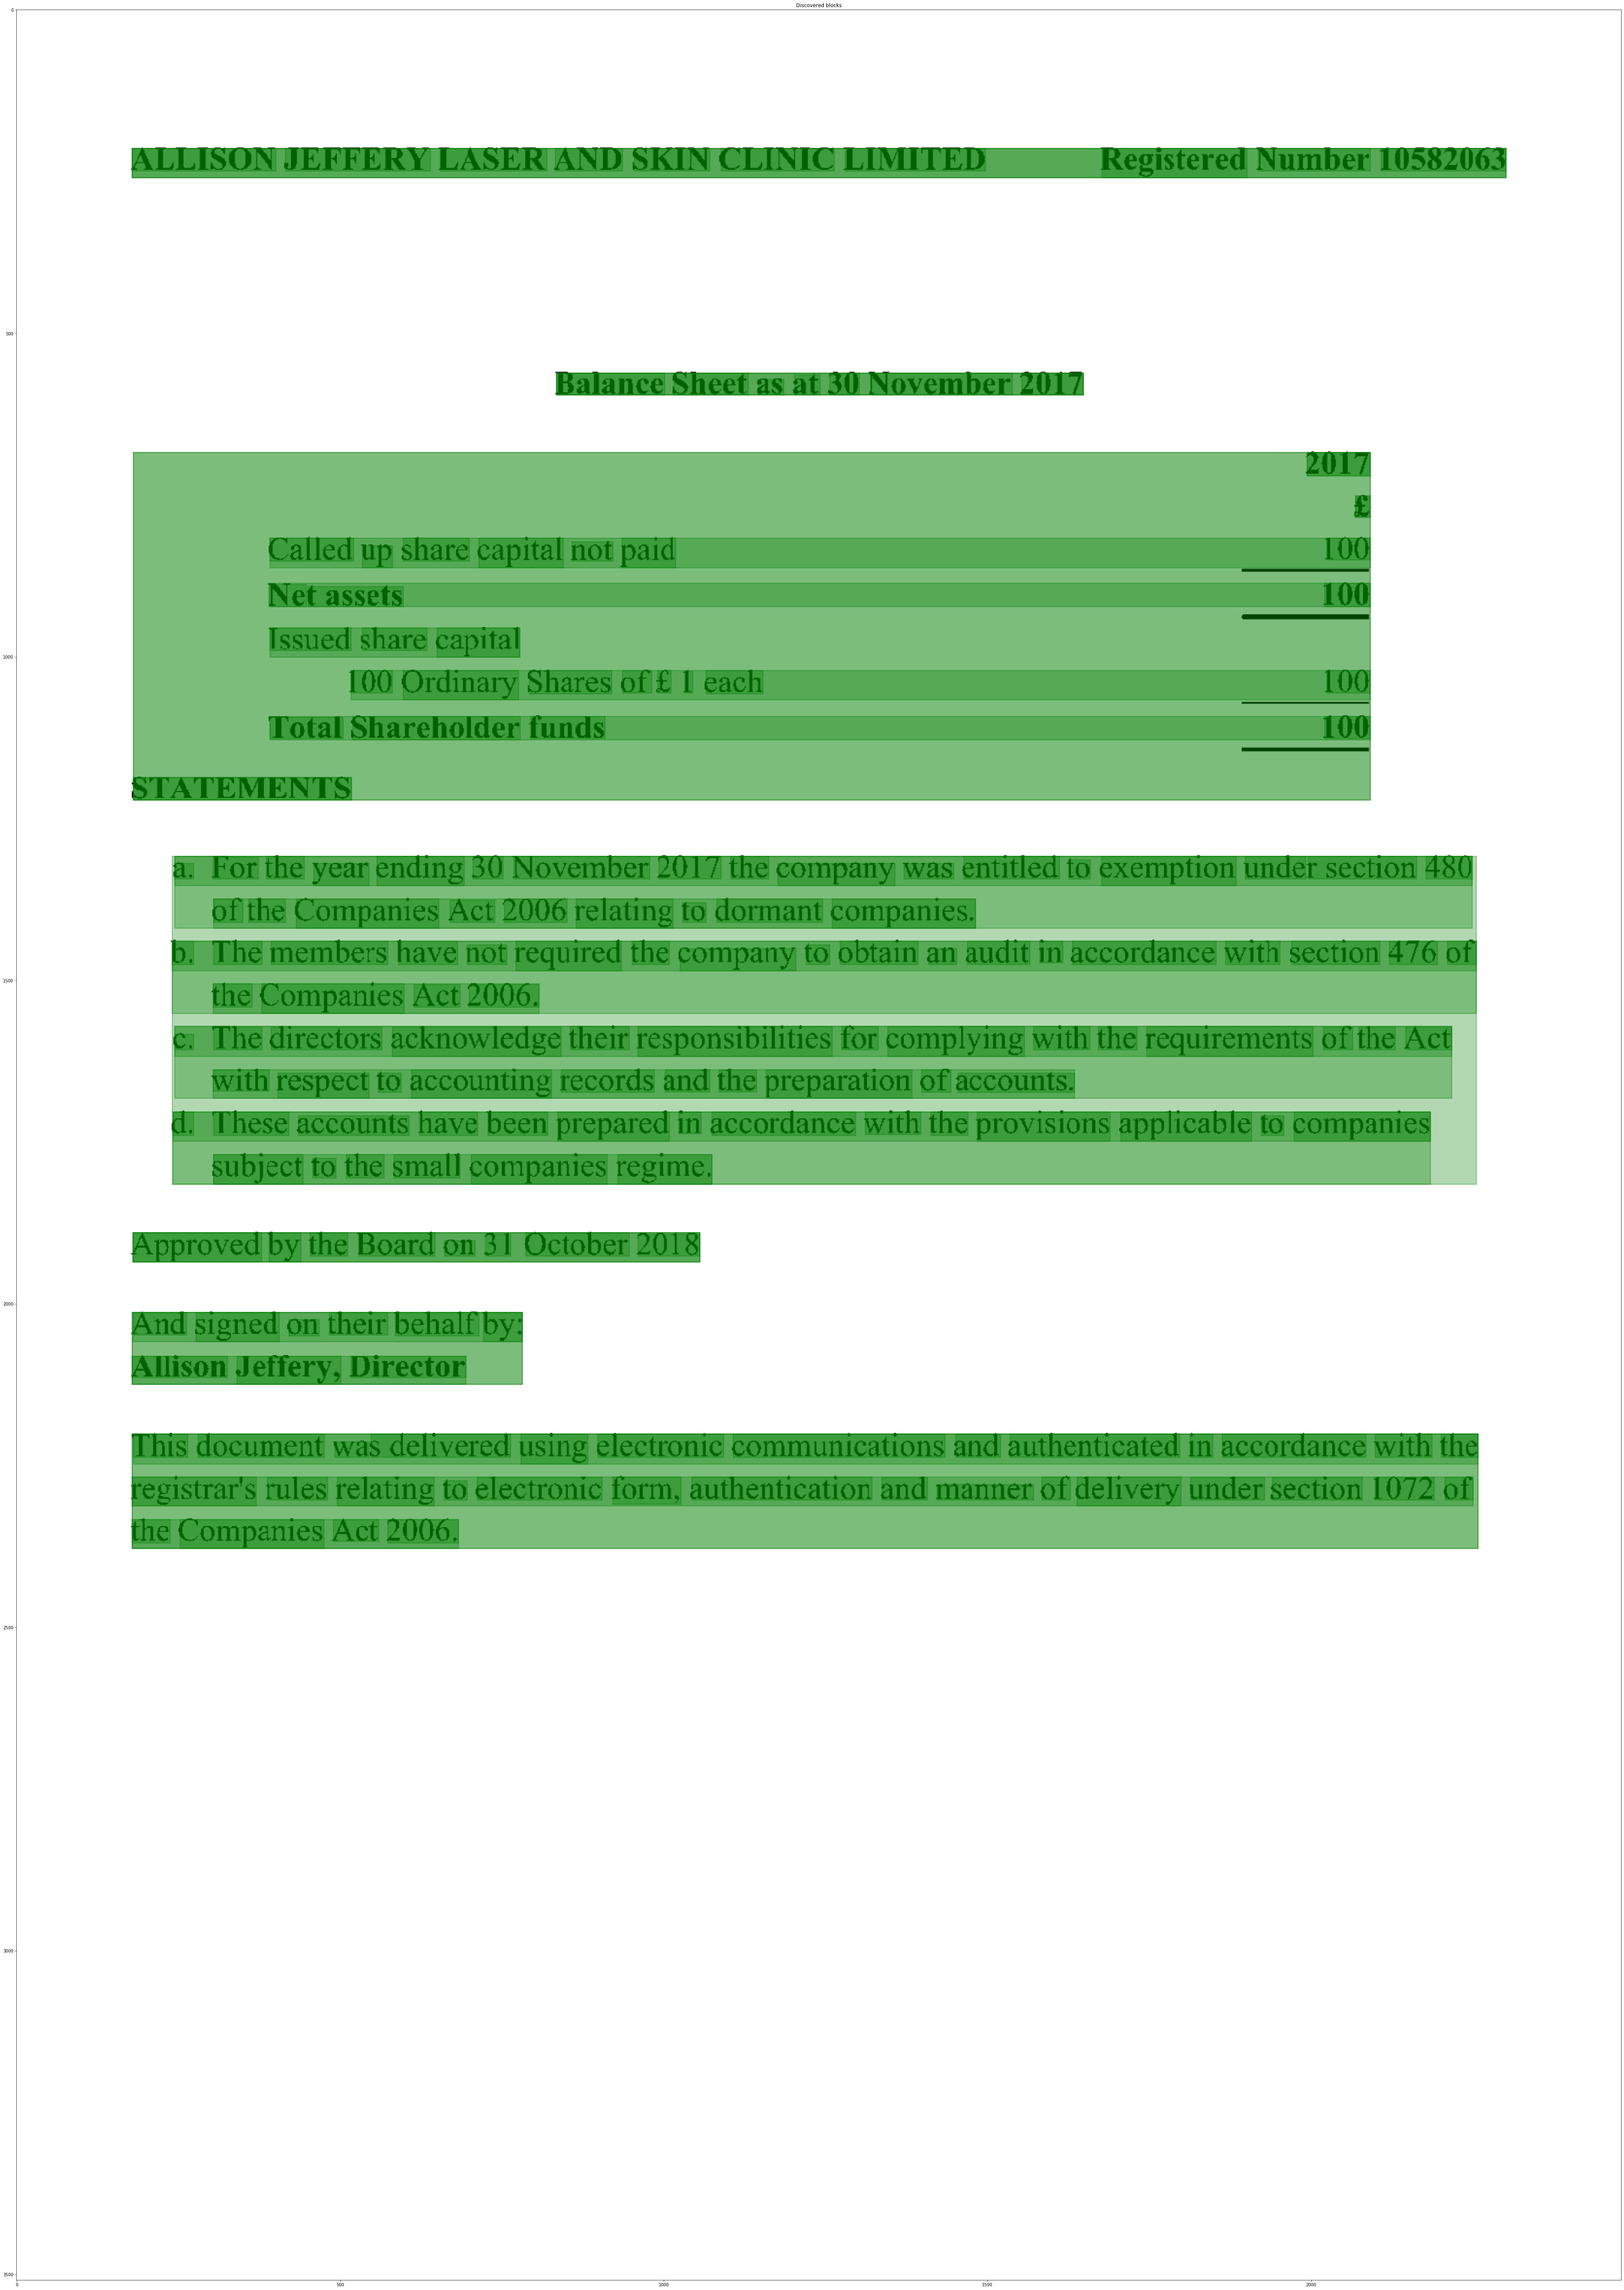

In [159]:
plot_doc(patches,vertices, f"{os.getcwd()}/data/old/read_check/wrong/{pdf_lst[0].split('.')[0]}-2.png")

Looks fine

In [133]:
whitespace

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,...,csv_num,centre_x,centre_y,right,bottom,area,numerical,whitespace,whitespace_frac,whitespace_anomalous
0,1,1,0,0,0,0,0,0,2480,3509,...,1,1240.0,1754.5,2480,3509,8702320,NaN,8702320,8.702320e+06,False
1,2,1,1,0,0,0,178,214,2123,45,...,1,1239.5,236.5,2301,259,95535,NaN,29805,9.553431e+04,False
2,3,1,1,1,0,0,178,214,2123,45,...,1,1239.5,236.5,2301,259,95535,NaN,29805,9.553431e+04,False
3,4,1,1,1,1,0,178,214,2123,45,...,1,1239.5,236.5,2301,259,95535,NaN,29805,9.553431e+04,False
4,5,1,1,1,1,1,178,214,222,35,...,1,289.0,231.5,400,249,7770,NaN,29805,9.553431e+04,False
5,5,1,1,1,1,2,415,214,224,35,...,1,527.0,231.5,639,249,7840,NaN,29805,9.553431e+04,False
6,5,1,1,1,1,3,654,214,165,35,...,1,736.5,231.5,819,249,5775,NaN,29805,9.553431e+04,False
7,5,1,1,1,1,4,832,214,104,35,...,1,884.0,231.5,936,249,3640,NaN,29805,9.553431e+04,False
8,5,1,1,1,1,5,954,214,117,35,...,1,1012.5,231.5,1071,249,4095,NaN,29805,9.553431e+04,False
9,5,1,1,1,1,6,1088,214,175,35,...,1,1175.5,231.5,1263,249,6125,NaN,29805,9.553431e+04,False
